In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",200)

import warnings
warnings.simplefilter('ignore') #uyarıları görmemek için.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB #binary ise evet- hayır, 1-0
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score #başarıyı öğrenmek için
from xgboost import XGBClassifier

r = RandomForestClassifier()
gbc = GradientBoostingClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()
xgbc = XGBClassifier()

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.columns =df.columns.str.replace(" ", "_")

In [4]:
df.head()

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [23]:
df = df[["GEO_Region","Price_Category_Code","Passenger_Count","Terminal"]]
df

,GEO_Region,Price_Category_Code,Passenger_Count,Terminal
0,US,Low Fare,27271,Terminal 1
1,US,Low Fare,29131,Terminal 1
2,US,Low Fare,5415,Terminal 1
3,Canada,Other,35156,Terminal 1
4,Canada,Other,34090,Terminal 1
...,...,...,...,...
18880,Europe,Other,50,International
18881,Canada,Other,10868,International
18882,Canada,Other,11664,International
18883,Europe,Other,804,International


In [48]:
df["Terminal"].unique()

array(['Terminal 1', 'International', 'Terminal 3', 'Other', 'Terminal 2'],
      dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GEO_Region           18885 non-null  object
 1   Price_Category_Code  18885 non-null  object
 2   Passenger_Count      18885 non-null  int64 
 3   Terminal             18885 non-null  object
dtypes: int64(1), object(3)
memory usage: 590.3+ KB


In [49]:
df["GEO_Region"] = df["GEO_Region"].astype("category")

In [50]:
df["Price_Category_Code"] = df["Price_Category_Code"].astype("category")

In [51]:
df["Terminal"] = df["Terminal"].astype("category")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GEO_Region           18885 non-null  category
 1   Price_Category_Code  18885 non-null  category
 2   Passenger_Count      18885 non-null  int64   
 3   Terminal             18885 non-null  category
dtypes: category(3), int64(1)
memory usage: 203.7 KB


In [25]:
df.isnull().sum()

GEO_Region             0
Price_Category_Code    0
Passenger_Count        0
Terminal               0
dtype: int64

In [26]:
df.shape

(18885, 4)

In [27]:
df.head()

,GEO_Region,Price_Category_Code,Passenger_Count,Terminal
0,US,Low Fare,27271,Terminal 1
1,US,Low Fare,29131,Terminal 1
2,US,Low Fare,5415,Terminal 1
3,Canada,Other,35156,Terminal 1
4,Canada,Other,34090,Terminal 1


In [53]:
x = pd.get_dummies(df,drop_first=True)

In [54]:
x

,Passenger_Count,GEO_Region_Australia / Oceania,GEO_Region_Canada,GEO_Region_Central America,GEO_Region_Europe,GEO_Region_Mexico,GEO_Region_Middle East,GEO_Region_South America,GEO_Region_US,Price_Category_Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3
0,27271,0,0,0,0,0,0,0,1,0,0,1,0,0
1,29131,0,0,0,0,0,0,0,1,0,0,1,0,0
2,5415,0,0,0,0,0,0,0,1,0,0,1,0,0
3,35156,0,1,0,0,0,0,0,0,1,0,1,0,0
4,34090,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,0,0,0,1,0,0,0,0,1,0,0,0,0
18881,10868,0,1,0,0,0,0,0,0,1,0,0,0,0
18882,11664,0,1,0,0,0,0,0,0,1,0,0,0,0
18883,804,0,0,0,1,0,0,0,0,1,0,0,0,0


In [60]:
model = KMeans(n_clusters=4) #Veriyi 4'e böldüm.
model = model.fit(x)
pred = model.predict(x)

In [61]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
x.head()

,Passenger_Count,GEO_Region_Australia / Oceania,GEO_Region_Canada,GEO_Region_Central America,GEO_Region_Europe,GEO_Region_Mexico,GEO_Region_Middle East,GEO_Region_South America,GEO_Region_US,Price_Category_Code_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3
0,27271,0,0,0,0,0,0,0,1,0,0,1,0,0
1,29131,0,0,0,0,0,0,0,1,0,0,1,0,0
2,5415,0,0,0,0,0,0,0,1,0,0,1,0,0
3,35156,0,1,0,0,0,0,0,0,1,0,1,0,0
4,34090,0,1,0,0,0,0,0,0,1,0,1,0,0


In [63]:
silhouette_score(x,y)

0.7861216955234733

In [58]:
clust = x.assign(Cluster =model.labels_)
model.cluster_centers_.astype("int")

model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
def cluster(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters = no_of_cluster)
        model = model.fit(y)
        pred = model.predict(x)
        score = silhouette_score(x,pred)
        print(f"Number of cluster {no_of_cluster}, silhouette {score}")

In [65]:
clust = x.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print(f'Number of cluster {no_of_cluster}, silhoutte {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)
#cluster' değişmediği noktada durmak gerekiyor.
#4 gruba ayırmak mantıklıymış.

Number of cluster 2, silhoutte 0.8596461995819217
Number of cluster 3, silhoutte 0.8286158604713372
Number of cluster 4, silhoutte 0.7861831855914189
Number of cluster 5, silhoutte 0.7844924899756253
Number of cluster 6, silhoutte 0.6607423254086041
Number of cluster 7, silhoutte 0.6622970079781386
Number of cluster 8, silhoutte 0.6509653179116209
Number of cluster 9, silhoutte 0.6413859236517557
Number of cluster 10, silhoutte 0.6127866165752038


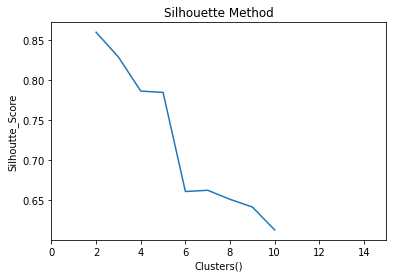

In [71]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [73]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.8596461995819217
Number of cluster 3, silhouette 0.8286421828901921
Number of cluster 4, silhouette 0.7861831855914189
Number of cluster 5, silhouette 0.7845446894594482
Number of cluster 6, silhouette 0.6585570327203845
Number of cluster 7, silhouette 0.6592060879801571
Number of cluster 8, silhouette 0.6467319395003722
Number of cluster 9, silhouette 0.6410106197466979


Text(0.5, 1.0, 'The Elbow Method showing optimal K')

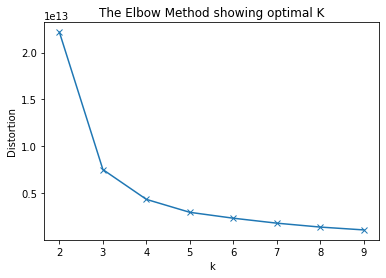

In [74]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
#dirseğin kıırldığı noktalar kaça bölmemizi gösteriyor. 4 mantıklı